# BEATS KBLT tomopy recon test 01
#### Reconstruction of CONTINUOUS SCAN - KBLTdataset 1 <br />
Author: [Gianluca Iori](mailto:gianluca.iori@sesame.org.jo)<br />
Created on: 06-11-2020 <br />
Modified on: 01-11-2022 <br />

see also:
https://tomopy.readthedocs.io/en/latest/ipynb/tomopy.html

#### Activate TomoPy kernel in Jupyter:
`conda env list`

`source activate tomopy`

`python -m ipykernel install --user --name tomopy_source --display-name "conda (tomopy_source)"`

`jupyter notebook &`

In [1]:
%%html
<style>
table {float:left}
</style>

In [2]:
import os
import dxchange
import tomopy
import numpy as np
import h5py
import matplotlib
import matplotlib.pyplot as plt
# import recon_utils

astropy module not found
olefile module not found


In [3]:
matplotlib.rcParams['figure.dpi'] = 150

In [4]:
import logging
logging.basicConfig(level=logging.INFO)

In [6]:
# BL-BEATS-WS01
h5file = "/home/beats/Data/kblt/roman_glass/kblt_test_roman_glass-20221101T141550/kblt_test_roman_glass-20221101T141550.h5"
h5file_darks = "/home/beats/Data/kblt/roman_glass/kblt_test_roman_glass_darks-20221101T142228/kblt_test_roman_glass_darks-20221101T142228.h5"
h5file_flats = "/home/beats/Data/kblt/roman_glass/kblt_test_roman_glass_flats-20221101T142132/kblt_test_roman_glass_flats-20221101T142132.h5"
path_recon = "/home/beats/Data/kblt/roman_glass/recon/"

#### Read HDF5 data
- The `.read_aps_32id()` method of DXchange can read TOMCAT .h5 data
- If run without arguments (proj..), the import seem to be virtual (mem map)? I don't see this data in the RAM and I can reconstruct the whole volume on my laptop

In [7]:
# read the projections
projs, flats, darks, theta = dxchange.read_aps_32id(h5file, exchange_rank=0)

INFO:dxchange.reader:Data successfully imported: /home/beats/Data/kblt/roman_glass/kblt_test_roman_glass-20221101T141550/kblt_test_roman_glass-20221101T141550.h5
INFO:dxchange.reader:Data successfully imported: /home/beats/Data/kblt/roman_glass/kblt_test_roman_glass-20221101T141550/kblt_test_roman_glass-20221101T141550.h5
INFO:dxchange.reader:Data successfully imported: /home/beats/Data/kblt/roman_glass/kblt_test_roman_glass-20221101T141550/kblt_test_roman_glass-20221101T141550.h5
INFO:dxchange.reader:Data successfully imported: /home/beats/Data/kblt/roman_glass/kblt_test_roman_glass-20221101T141550/kblt_test_roman_glass-20221101T141550.h5
INFO:dxchange.reader:Data successfully imported: /home/beats/Data/kblt/roman_glass/kblt_test_roman_glass-20221101T141550/kblt_test_roman_glass-20221101T141550.h5
INFO:dxchange.reader:Data successfully imported: /home/beats/Data/kblt/roman_glass/kblt_test_roman_glass-20221101T141550/kblt_test_roman_glass-20221101T141550.h5


In [8]:
print(projs.shape[:])
print(projs.dtype)

(500, 1400, 880)
uint16


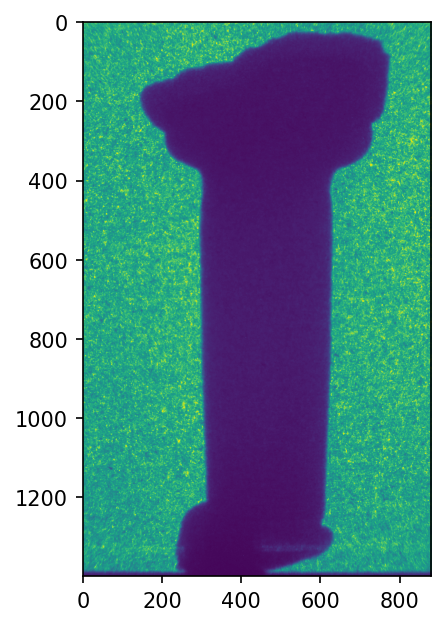

In [8]:
plt.imshow(projs[50, :, :])
plt.show()

Check if theta exists

In [16]:
theta/np.pi*180

array([  0.       ,   0.36     ,   0.72     ,   1.08     ,   1.44     ,
         1.7999998,   2.16     ,   2.52     ,   2.88     ,   3.2399998,
         3.5999997,   3.9599996,   4.32     ,   4.68     ,   5.04     ,
         5.4      ,   5.76     ,   6.12     ,   6.4799995,   6.8400006,
         7.1999993,   7.56     ,   7.919999 ,   8.28     ,   8.64     ,
         9.       ,   9.36     ,   9.72     ,  10.08     ,  10.439999 ,
        10.8      ,  11.159999 ,  11.52     ,  11.88     ,  12.24     ,
        12.6      ,  12.959999 ,  13.319999 ,  13.680001 ,  14.04     ,
        14.399999 ,  14.759999 ,  15.12     ,  15.479998 ,  15.839998 ,
        16.2      ,  16.56     ,  16.92     ,  17.28     ,  17.64     ,
        18.       ,  18.36     ,  18.72     ,  19.08     ,  19.44     ,
        19.8      ,  20.16     ,  20.52     ,  20.879997 ,  21.239998 ,
        21.6      ,  21.96     ,  22.319998 ,  22.68     ,  23.04     ,
        23.4      ,  23.76     ,  24.12     ,  24.48     ,  24.8

If the angular information is not avaialable from the raw data you need to set the data collection angles. In this case, theta is set as equally spaced between 0-180 degrees.

In [12]:
if theta is None:
    theta = tomopy.angles(projs.shape[0])

#### Read additional theta array from encoder readout

In [36]:
theta_readout = dxchange.read_hdf5(h5file, '/exchange/theta_readout')

INFO:dxchange.reader:Data successfully imported: /home/beats/Data/kblt/roman_glass/kblt_test_roman_glass-20221101T141550/kblt_test_roman_glass-20221101T141550.h5


In [39]:
print(theta_readout)

[  1.3344   1.6832   2.027    2.3706   2.719    3.0582   3.4076   3.755
   4.0974   4.4452   4.7868   5.1308   5.4808   5.8234   6.17     6.5156
   6.8562   7.2068   7.5526   7.8964   8.245    8.5876   9.2842   9.627
   9.9716  10.3206  10.664   11.0118  11.3624  11.716   12.056   12.407
  12.7526  13.0988  13.4484  13.7922  14.1354  14.487   14.8338  15.1796
  15.5278  15.8744  16.2176  16.5686  16.9184  17.2596  17.6092  18.3046
  18.6518  19.0022  19.3434  19.6908  20.0406  20.382   20.7294  21.0744
  21.4182  21.7682  22.1184  22.4622  22.809   23.1564  23.5006  23.8504
  24.2008  24.5402  24.8888  25.2382  25.5816  25.9304  26.2784  26.6188
  27.3198  27.6628  28.0104  28.358   28.7002  29.0496  29.3992  29.7398
  30.089   30.4372  30.7796  31.13    31.4782  31.818   32.1686  32.5178
  32.8608  33.2094  33.554   33.8964  34.2482  34.599   34.9418  35.2892
  35.6386  36.3298  36.681   37.0228  37.3698  37.72    38.0632  38.4102
  38.759   39.0992  39.4502  39.7994  40.1424  40.49  

#### Read flats and darks from another scan
We forgot to colelct flats and darks! Flats and darks are taken from a previous scan (separate files) and need to be cropped to the same ROI

In [9]:
# read the flats
tmp, flats, tmp2, tmp3 = dxchange.read_aps_32id(h5file_flats)

INFO:dxchange.reader:Data successfully imported: /home/beats/Data/kblt/roman_glass/kblt_test_roman_glass_flats-20221101T142132/kblt_test_roman_glass_flats-20221101T142132.h5
INFO:dxchange.reader:Data successfully imported: /home/beats/Data/kblt/roman_glass/kblt_test_roman_glass_flats-20221101T142132/kblt_test_roman_glass_flats-20221101T142132.h5
INFO:dxchange.reader:Data successfully imported: /home/beats/Data/kblt/roman_glass/kblt_test_roman_glass_flats-20221101T142132/kblt_test_roman_glass_flats-20221101T142132.h5
ERROR:dxchange.reader:Unrecognized hdf5 dataset: "exchange/theta"
INFO:dxchange.reader:Data successfully imported: /home/beats/Data/kblt/roman_glass/kblt_test_roman_glass_flats-20221101T142132/kblt_test_roman_glass_flats-20221101T142132.h5
INFO:dxchange.reader:Data successfully imported: /home/beats/Data/kblt/roman_glass/kblt_test_roman_glass_flats-20221101T142132/kblt_test_roman_glass_flats-20221101T142132.h5
INFO:dxchange.reader:Data successfully imported: /home/beats/Dat

In [18]:
print(flats.shape[:])

(20, 1400, 880)


In [10]:
# read the darks
tmp, tmp2, darks, tmp3 = dxchange.read_aps_32id(h5file_darks)

INFO:dxchange.reader:Data successfully imported: /home/beats/Data/kblt/roman_glass/kblt_test_roman_glass_darks-20221101T142228/kblt_test_roman_glass_darks-20221101T142228.h5
INFO:dxchange.reader:Data successfully imported: /home/beats/Data/kblt/roman_glass/kblt_test_roman_glass_darks-20221101T142228/kblt_test_roman_glass_darks-20221101T142228.h5
INFO:dxchange.reader:Data successfully imported: /home/beats/Data/kblt/roman_glass/kblt_test_roman_glass_darks-20221101T142228/kblt_test_roman_glass_darks-20221101T142228.h5
ERROR:dxchange.reader:Unrecognized hdf5 dataset: "exchange/theta"
INFO:dxchange.reader:Data successfully imported: /home/beats/Data/kblt/roman_glass/kblt_test_roman_glass_darks-20221101T142228/kblt_test_roman_glass_darks-20221101T142228.h5
INFO:dxchange.reader:Data successfully imported: /home/beats/Data/kblt/roman_glass/kblt_test_roman_glass_darks-20221101T142228/kblt_test_roman_glass_darks-20221101T142228.h5
INFO:dxchange.reader:Data successfully imported: /home/beats/Dat

In [20]:
print(darks.shape[:])

(20, 1400, 880)


#### Flat field correction

In [11]:
projs_corr = tomopy.normalize(projs, flats, darks)
# print(projs.dtype)

#### Calculate $ -log(projs) $ to linearize transmission tomography data.

In [12]:
projs_corr = tomopy.minus_log(projs_corr)

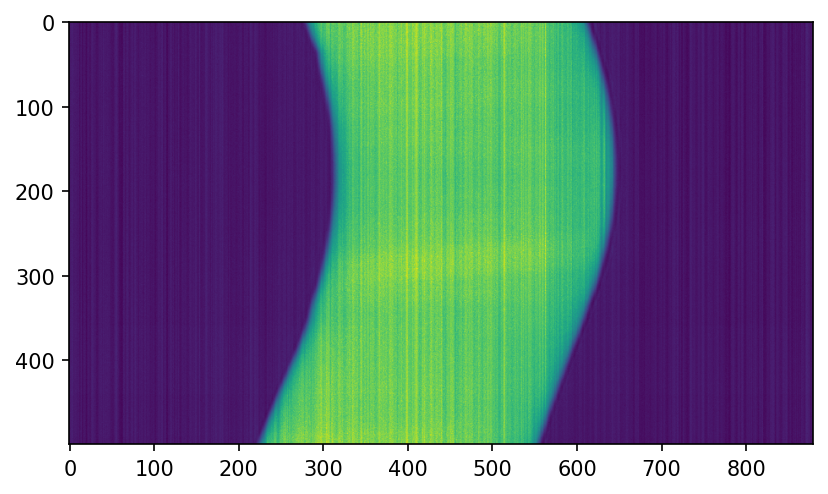

In [13]:
plt.imshow(projs_corr[:, 480, :])
plt.show()

#### Automatic detect Center Of Rotation (COR)

In [27]:
COR = tomopy.find_center_vo(projs_corr)
print(COR)

384.0


In [ ]:
COR = tomopy.find_center(projs_crop_corr, theta, init=projs_crop_corr.shape[2]/2, ind=1000, tol=0.5)
print(COR)

In [36]:
del recon

#### Save images reconstructed with a range of rotation centers

In [32]:
path_test = "/home/gianthk/Data/BEATS/kblt/roman_glass/test/"

In [35]:
tomopy.write_center(projs_corr, theta, path_test, [410, 430, 1])

INFO:tomopy.recon.algorithm:Reconstructing 20 slice groups with 8 master threads...


The Center Of Rotation is 417

#### Reconstruction with CPU
|  |  |
| :--- | :--- |
| **Algorithm**      | `gridrec` |

In [18]:
recon = tomopy.recon(projs_corr, theta, center=417, algorithm='gridrec', sinogram_order=False)

INFO:tomopy.recon.algorithm:Reconstructing 36 slice groups with 36 master threads...


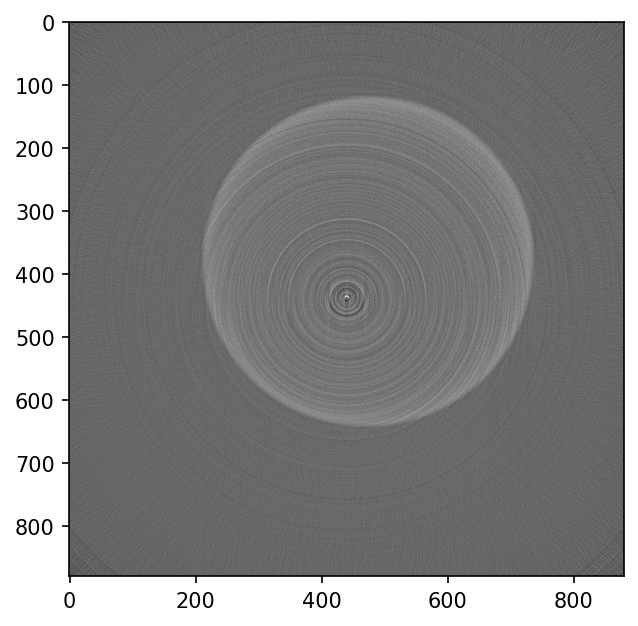

In [19]:
plt.imshow(recon[300, :, :], cmap='gray')
plt.show()

In [42]:
recon.dtype

dtype('float32')

___
#### Reconstruction with GPU
|  |  |
| :--- | :--- |
| **Algorithm**      | `sirt` |

In [ ]:
recon_gpu = tomopy.recon(projs_corr, theta, center=417, accelerated=True, algorithm='mlem', sinogram_order=False)

**tomopy GPU recon goes Out of Memory**

___
#### Reconstruction with astra-GPU
|  |  |
| :--- | :--- |
| **Algorithm**      | `FBP` |

In [15]:
options = {'proj_type': 'cuda', 'method': 'FBP_CUDA'}

In [16]:
recon_gpu = tomopy.recon(projs_corr,
                         theta,
                         center=417,
                         algorithm=tomopy.astra,
                         options=options,
                         ncore=1)

INFO:tomopy.recon.algorithm:Reconstructing 1 slice groups with 1 master threads...


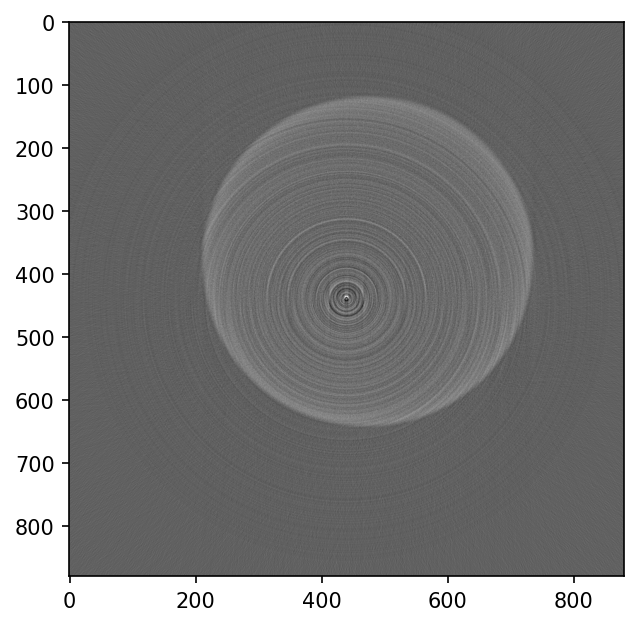

In [17]:
plt.imshow(recon_gpu[300, :, :], cmap='gray')
plt.show()

#### Reconstruction with astra-GPU; encoder theta readout

In [40]:
recon_gpu_readout = tomopy.recon(projs_corr,
                         np.pi*theta_readout/180,
                         center=417,
                         algorithm=tomopy.astra,
                         options=options,
                         ncore=1)

INFO:tomopy.recon.algorithm:Reconstructing 1 slice groups with 1 master threads...


#### Ring artefact correction
Removes ring artefacts in the reconstruction domain

`tomopy.misc.corr.remove_ring(rec, center_x=None, center_y=None, thresh=300.0, thresh_max=300.0, thresh_min=-100.0, theta_min=30, rwidth=30, int_mode='WRAP', ncore=None, nchunk=None, out=None)`


In [44]:
recon_gpu_readout_ring = tomopy.misc.corr.remove_ring(recon_gpu_readout,
                                                      center_x=None,
                                                      center_y=None,
                                                      thresh=300.0,
                                                      thresh_max=300.0,
                                                      thresh_min=-100.0,
                                                      theta_min=30,
                                                      rwidth=30,
                                                      int_mode='WRAP')

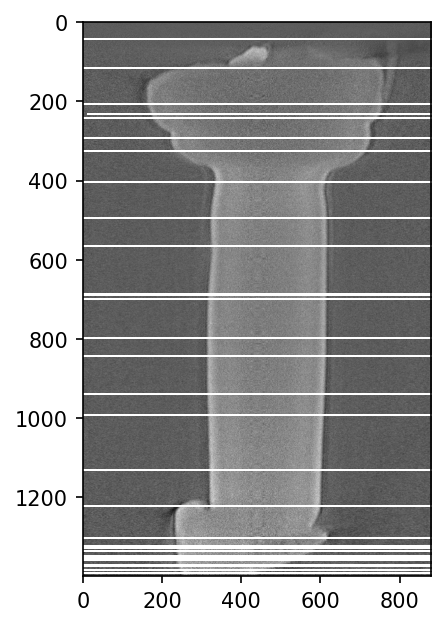

In [47]:
plt.imshow(recon_gpu_readout_ring[:, 300, :], cmap='gray')
plt.show()

#### Apply circular mask

In [79]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)

Visualize results

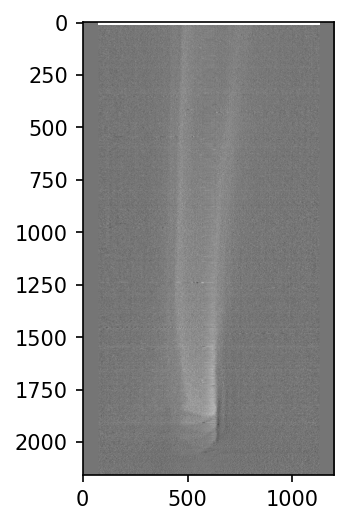

In [80]:
plt.imshow(recon[:, :, 380], cmap='gray')
plt.show()

#### Scale to 0-255 (`uint8`)
The uint8 GV range for output slices can cover the full float32 range or be selected based on the 3D data histogram

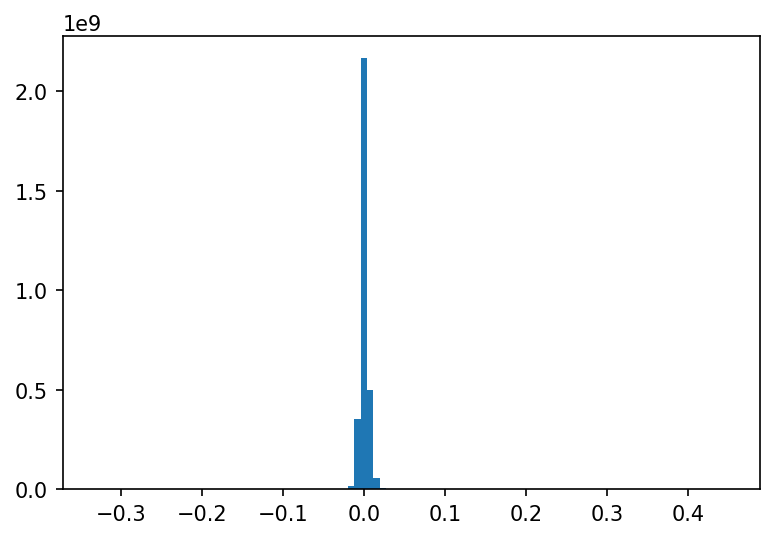

In [81]:
plt.hist(recon.ravel(), bins=100)
plt.show()

In [24]:
# uint8 GV range from data histogram (0.01 and 0.99 quantiles)
[range_min, q_95] = 1.1*np.quantile(recon.ravel(), [0.01, 0.99])
range_max = q_95 - range_min
print(range_min, range_max)

-0.006460846308618784 0.02500996766611934


In [51]:
# uint8 GV range as MIN and MAX of 3D data
range_min = np.nanmin(recon)
range_max = np.nanmax(recon)
range_max = range_max - range_min

In [52]:
recon_uint8Range = 255*((recon - range_min)/range_max)

In [53]:
recon_uint8Range[recon_uint8Range < 0] = 0

In [54]:
recon_uint8Range[recon_uint8Range > 255] = 255

In [30]:
# apply again circ mask
recon_uint8Range = tomopy.circ_mask(recon_uint8Range, axis=0, ratio=0.95)

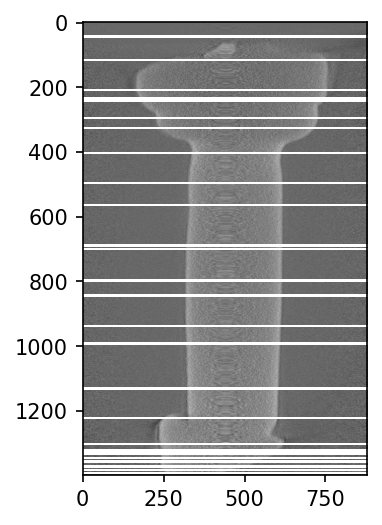

In [56]:
plt.imshow(recon_uint8Range[:, 300, :], cmap='gray')
plt.show()

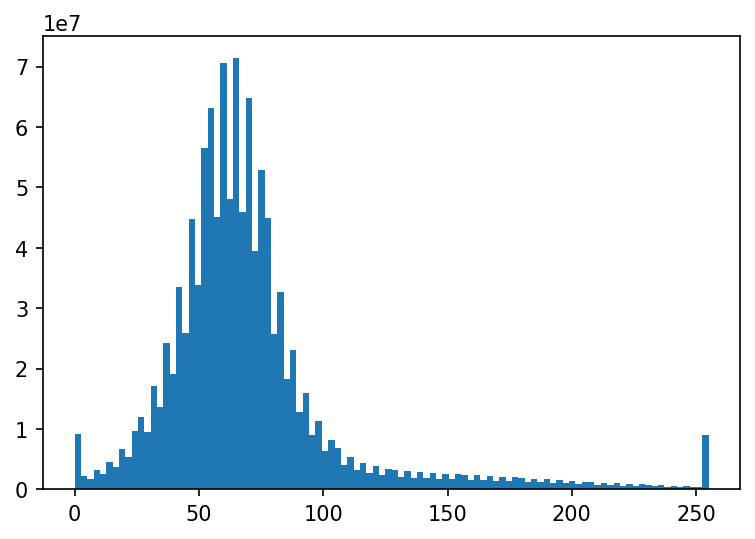

In [29]:
plt.hist(recon_uint8Range.round().ravel(), bins=100)
plt.show()

#### Write output Tiff stack as `uint8`

In [57]:
fileout = path_recon+'kblt_roman_glass.tiff'
dxchange.writer.write_tiff_stack(recon, fname=fileout, axis=0, digit=5, start=0, overwrite=True)

In [30]:
fileout = path_recon+'kblt_roman_glass.tiff'
dxchange.writer.write_tiff_stack(recon_uint8Range, fname=fileout, dtype='uint8', axis=0, digit=5, start=0, overwrite=True)

#### Open virtual stack in ImageJ

In [19]:
os.system(Fiji_exe_stack + '/home/gianthk/Data/StefanFly_test/test_00_/rec_8bit_0/test_00_001.rec.8bit.tif &')

0

#### Save images reconstructed with a range of rotation centers.

In [35]:
tomopy.write_center(projs, theta, dpath=path_recon+'tmp/COR', cen_range=[COR-10, COR+10, 1], ind=500, mask=True, ratio=1.0, algorithm='gridrec', filter_name='parzen')

Reconstructing 20 slice groups with 8 master threads...


View them in Fiji

In [64]:
os.system(Fiji_exe_stack + path_recon+'tmp/COR/'+'{:04.2f}'.format(COR[0])+'.tiff &')

0

Optimize the reconstruction around given COR

In [67]:
tomopy.write_center(projs, theta, dpath=path_recon+'tmp/COR', cen_range=[482, 490, 0.5], ind=500, mask=True, ratio=1.0, algorithm='gridrec', filter_name='parzen')

Reconstructing 16 slice groups with 8 master threads...


View them in Fiji

In [69]:
os.system(Fiji_exe_stack + path_recon+'tmp/COR/482.00.tiff &')

0